#### Part 1 | Load and Validate the Data
#### Part 2 | Merge Dataframes
#### Part 3 | Data Exploration
#### Part 4 | Visualizations

## Part 1 | Load and Validate the Data

In [1]:
# imports

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns 

/home/chase/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
math_path = '/home/chase/repos/Student_Performance/data/student-mat.csv'
math = pd.read_csv(math_path, sep=';')
port_path = '/home/chase/repos/Student_Performance/data/student-por.csv'
port = pd.read_csv(port_path, sep=';')

In [3]:
print(math.shape)
print(math.head())
print(port.shape)
print(port.head())

(395, 33)
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
(649, 33)
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      

## Part 2 | Merge Dataframes

In [4]:
# merge datasets

df = pd.concat([math, port])

# rename columns

df.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
              'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
              'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
              'free_time','go_out','weekday_alcohol_use','weekend_alcohol_use','health','absences','period1_score','period2_score',
              'final_score']

df.head()

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,family_quality,free_time,go_out,weekday_alcohol_use,weekend_alcohol_use,health,absences,period1_score,period2_score,final_score
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
# convert and assign final score to pass(1) & fail(0)
# pass >= 14
# fail < 14

df['passing_grade'] = 'passing_grade'
df.loc[(df.final_score >= 14), 'passing_grade'] = 1
df.loc[(df.final_score < 14), 'passing_grade'] = 0
df.head()

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,free_time,go_out,weekday_alcohol_use,weekend_alcohol_use,health,absences,period1_score,period2_score,final_score,passing_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,0


In [6]:
# check for nan's

df.isnull().sum()

school                 0
sex                    0
age                    0
address                0
family_size            0
parents_status         0
mother_education       0
father_education       0
mother_job             0
father_job             0
reason                 0
guardian               0
commute_time           0
study_time             0
failures               0
school_support         0
family_support         0
paid_classes           0
activities             0
nursery                0
desire_higher_edu      0
internet               0
romantic               0
family_quality         0
free_time              0
go_out                 0
weekday_alcohol_use    0
weekend_alcohol_use    0
health                 0
absences               0
period1_score          0
period2_score          0
final_score            0
passing_grade          0
dtype: int64

## Part 3 | Data Exploration

In [7]:
print(df.shape)
print(df.dtypes)

(1044, 34)
school                 object
sex                    object
age                     int64
address                object
family_size            object
parents_status         object
mother_education        int64
father_education        int64
mother_job             object
father_job             object
reason                 object
guardian               object
commute_time            int64
study_time              int64
failures                int64
school_support         object
family_support         object
paid_classes           object
activities             object
nursery                object
desire_higher_edu      object
internet               object
romantic               object
family_quality          int64
free_time               int64
go_out                  int64
weekday_alcohol_use     int64
weekend_alcohol_use     int64
health                  int64
absences                int64
period1_score           int64
period2_score           int64
final_score             int64

In [8]:
# convert passing grades to ints

df['passing_grade'] = df.passing_grade.astype(int)
df.dtypes

school                 object
sex                    object
age                     int64
address                object
family_size            object
parents_status         object
mother_education        int64
father_education        int64
mother_job             object
father_job             object
reason                 object
guardian               object
commute_time            int64
study_time              int64
failures                int64
school_support         object
family_support         object
paid_classes           object
activities             object
nursery                object
desire_higher_edu      object
internet               object
romantic               object
family_quality          int64
free_time               int64
go_out                  int64
weekday_alcohol_use     int64
weekend_alcohol_use     int64
health                  int64
absences                int64
period1_score           int64
period2_score           int64
final_score             int64
passing_gr

In [9]:
# save df as csv for later use

df.to_csv('/home/chase/repos/Student_Performance/data/student_performance.csv')

In [10]:
df.describe()

,age,mother_education,father_education,commute_time,study_time,failures,family_quality,free_time,go_out,weekday_alcohol_use,weekend_alcohol_use,health,absences,period1_score,period2_score,final_score,passing_grade
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954,0.281609
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796,0.449999
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,1.000000


In [11]:
# baseline for later

df['passing_grade'].value_counts(normalize=True).max()

0.7183908045977011

## Part 4 | Visualizations

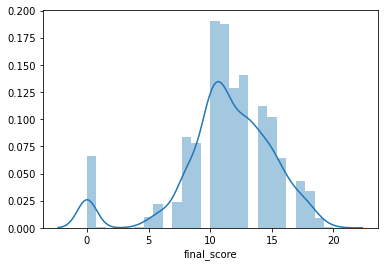

In [12]:
# distribution plot of final_grade

sns.distplot(df['final_score']);

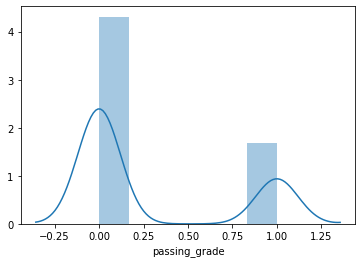

In [13]:
# distribution plot of passing_grade

sns.distplot(df['passing_grade']);

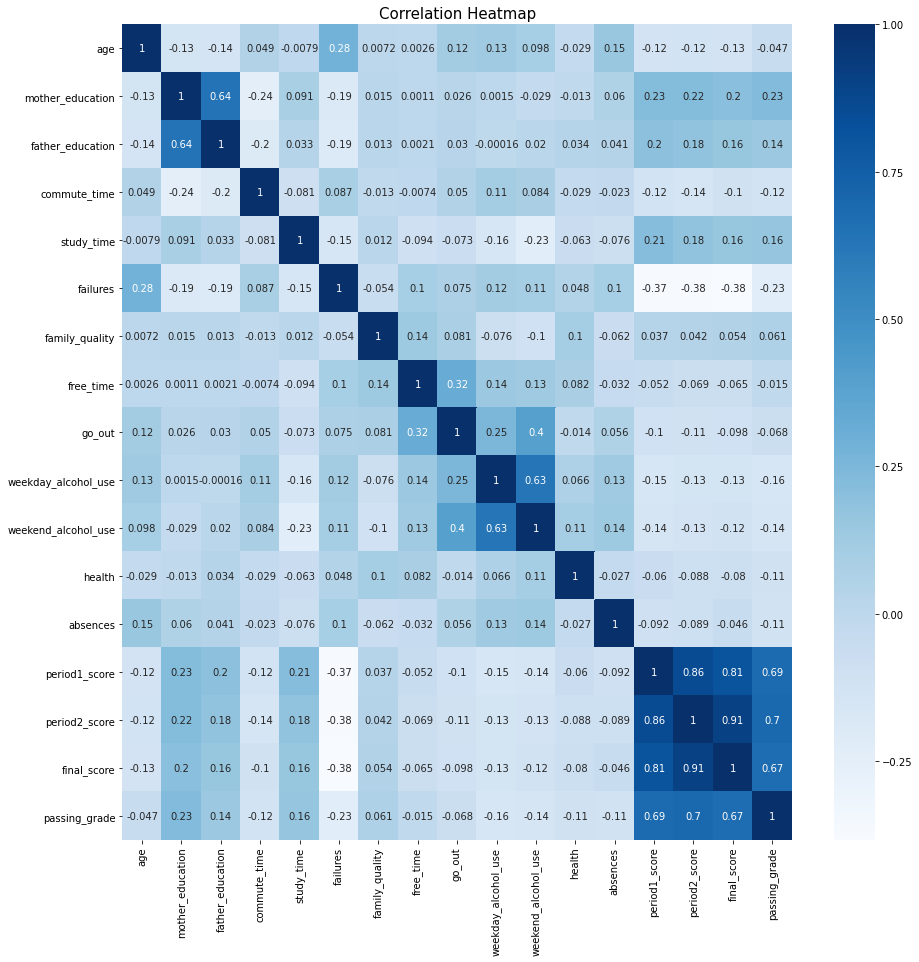

In [14]:
# passing_grade correlation heat map

corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title('Correlation Heatmap', fontsize=15);